## Newton's Linearization Technique

You are given non-linear BVP $$ y'' - f(y', y, x) = 0 $$ subject to conditions 
$$y(a) = y_a $$
$$y(b) = y_b $$
Discretizing the equation we get a system of equations
$$ G_i(y_{i+1}, y_i, y_{i-1}) = 0 $$

Since, $f$ is not linear $G_i$ is not a linear system and cannot be solved as a tridiagonal system.
$$ G_i(y_{i+1}^{(k)} + \Delta y_{i+1}^{(k)}, y_{i}^{(k)} + \Delta y_{i}^{(k)}, y_{i-1}^{(k)} + \Delta y_{i-1}^{(k)}) = 0 $$
Ignore the higer order terms we get:

$$ G_i(y_{i+1}^{(k)}, y_{i}^{(k)}, y_{i-1}^{(k)}) + \Delta y_{i+1}^{(k)} \frac{\partial G_i}{\partial y_{i+1}} |^{(k)} + \Delta y_{i}^{(k)} \frac{\partial G_i}{\partial y_i} |^{(k)} + \Delta y_{i-1}^{(k)} \frac{\partial G_i}{\partial y_{i-1}} |^{(k)}= 0 $$

Since boundary conditions are known $\Delta y_0 = 0 $ and $\Delta y_n = 0 $
This is tridiagol linear system can be solved using thomas algorithm

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f

We are using the Newton's Linearization Technique to solve the equation
$$ y'' - (y')^2 - y^2 + y + 1 = 0 $$
For the Boundary conditions
$$y(0) = 0.5$$
$$y(\pi) = -0.5$$

In [3]:
dx = 0.01
n = int(np.pi/dx)
X = np.linspace(0, np.pi, n)

# taking initial solution as (pi - x)/(2*pi) - x/(2*pi) = 1/2 - x/pi
Y = 0.5 - X/(np.pi)

# print Y

k = 40

for i in range(k):
    # We write a_i * Dy_(i-1) + b_i * Dy_i + c_i * Dy_(i+1) = d_i
    A = np.array([4 + 2*(Y[i+1] - Y[i-1]) for i in range(1, n-1)],
            dtype=np.float16)
    B = np.array([4 + 2*(Y[i-1] - Y[i+1]) for i in range(1, n-1)], dtype=np.float16)
    C = np.array([-8*dx**2*Y[i] + 4*dx**2 - 8
                  for i in range(1, n-1)], dtype=np.float16)
    D = np.array([4*dx**2*(-Y[i]**2 + Y[i] + 1) - (Y[i+1] - Y[i-1])**2
                  for i in range(1, n-1)], dtype=np.float16)


    DY = np.array([0] + thomas_algorithm(A, B, C, D) + [0], dtype=np.float16)

    Y = Y + DY

# print Y

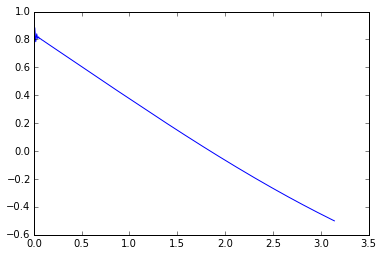

In [4]:
%matplotlib inline
plt.plot(X, Y)

In [5]:
# Execute this cell to load the notebook's style sheet, then ignore it
# The stylesheets are taken from the numerical methods mooc at
# http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())